In [1]:
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()  # Allows you to upload files


Saving Prostate_Cancer.csv to Prostate_Cancer.csv


In [4]:
import pandas as pd

data = pd.read_csv('Prostate_Cancer.csv')
print(data.head())


   id diagnosis_result  radius  texture  perimeter  area  smoothness  \
0   1                M      23       12        151   954       0.143   
1   2                B       9       13        133  1326       0.143   
2   3                M      21       27        130  1203       0.125   
3   4                M      14       16         78   386       0.070   
4   5                M       9       19        135  1297       0.141   

   compactness  symmetry  fractal_dimension  
0        0.278     0.242              0.079  
1        0.079     0.181              0.057  
2        0.160     0.207              0.060  
3        0.284     0.260              0.097  
4        0.133     0.181              0.059  


In [5]:
# Check the structure of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB
None


In [6]:
# Display basic statistics for numerical columns
print(data.describe())

               id      radius     texture   perimeter         area  \
count  100.000000  100.000000  100.000000  100.000000   100.000000   
mean    50.500000   16.850000   18.230000   96.780000   702.880000   
std     29.011492    4.879094    5.192954   23.676089   319.710895   
min      1.000000    9.000000   11.000000   52.000000   202.000000   
25%     25.750000   12.000000   14.000000   82.500000   476.750000   
50%     50.500000   17.000000   17.500000   94.000000   644.000000   
75%     75.250000   21.000000   22.250000  114.250000   917.000000   
max    100.000000   25.000000   27.000000  172.000000  1878.000000   

       smoothness  compactness    symmetry  fractal_dimension  
count  100.000000   100.000000  100.000000         100.000000  
mean     0.102730     0.126700    0.193170           0.064690  
std      0.014642     0.061144    0.030785           0.008151  
min      0.070000     0.038000    0.135000           0.053000  
25%      0.093500     0.080500    0.172000       

In [7]:
# Check for missing values
print(data.isnull().sum())


id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64


In [8]:
# Display column names
print(data.columns)


Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['diagnosis_result'] = label_encoder.fit_transform(data['diagnosis_result'])


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']] = scaler.fit_transform(data[['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']])


In [14]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['id', 'diagnosis_result'])  # Features
y = data['diagnosis_result']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [16]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.75
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.82      0.88      0.85        16

    accuracy                           0.75        20
   macro avg       0.58      0.56      0.57        20
weighted avg       0.73      0.75      0.74        20



In [17]:
import joblib
joblib.dump(model, 'prostate_cancer_model.pkl')


['prostate_cancer_model.pkl']

In [20]:
import pickle

# Save the model to a file
with open('prostate_cancer_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [21]:
import pickle

# Load the saved model
with open('prostate_cancer_model.pkl', 'rb') as f:
    model = pickle.load(f)


In [22]:
import pandas as pd

# Example test data (the structure must match the training data)
test_data = pd.DataFrame({
    'radius': [10.5],
    'texture': [18.3],
    'perimeter': [68.5],
    'area': [300.2],
    'smoothness': [0.1],
    'compactness': [0.2],
    'symmetry': [0.3],
    'fractal_dimension': [0.05]
})


In [23]:
# Example: Scaling (if you scaled the data during training)
from sklearn.preprocessing import StandardScaler

# Assuming you used StandardScaler for scaling
scaler = StandardScaler()

# Apply the same scaling to the test data
test_data_scaled = scaler.fit_transform(test_data)


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
# Assuming these are the columns that were used during training
columns_to_scale = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'symmetry', 'fractal_dimension']


In [27]:
# Initialize the scaler
scaler = StandardScaler()

In [28]:
# Apply scaling only to the relevant columns in the test data
test_data_scaled = scaler.fit_transform(test_data[columns_to_scale])

In [29]:
# Convert scaled data back to DataFrame for easy interpretation
test_data_scaled = pd.DataFrame(test_data_scaled, columns=columns_to_scale)

In [30]:
# If you need to display or use the scaled data
print(test_data_scaled)

   radius  texture  perimeter  area  smoothness  compactness  symmetry  \
0     0.0      0.0        0.0   0.0         0.0          0.0       0.0   

   fractal_dimension  
0                0.0  


In [31]:
# Assuming you have already loaded the trained model
prediction = model.predict(test_data_scaled)

In [32]:
# If the model provides probabilities, you can get them as well
prediction_prob = model.predict_proba(test_data_scaled)

In [33]:
# Print prediction (numerical output, e.g., 0 or 1)
print(f'Prediction (Numerical): {prediction[0]}')

Prediction (Numerical): 1


In [34]:
# Interpret the result
if prediction[0] == 1:
    print("The prediction is: Malignant")
else:
    print("The prediction is: Benign")

The prediction is: Malignant


In [35]:
# Print the prediction probabilities
print(f'Prediction Probability: {prediction_prob[0]}')

Prediction Probability: [0. 1.]


In [36]:
from sklearn.metrics import accuracy_score, classification_report

# Assume `y_test` is the actual labels for your test data
y_test = [2]  # Example: replace with real test labels
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [37]:
# Print the prediction probabilities as percentages
benign_prob = prediction_prob[0][0] * 100
malignant_prob = prediction_prob[0][1] * 100

In [38]:
print(f'Prediction Probability for Benign: {benign_prob:.2f}%')
print(f'Prediction Probability for Malignant: {malignant_prob:.2f}%')

Prediction Probability for Benign: 0.00%
Prediction Probability for Malignant: 100.00%


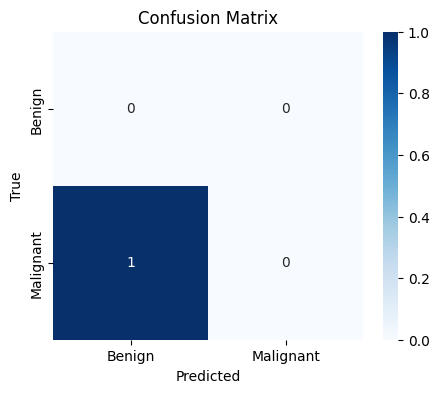

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [40]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'prostate_cancer_model.pkl')

# Save the scaler used for data transformation
joblib.dump(scaler, 'scaler_file.pkl')


['scaler_file.pkl']